In [169]:
from os import rename

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('C:\\Users\\Jonathan\\PycharmProjects\\Raw data\\Gross Domestic Product.csv')

In [171]:
df.shape

(312, 2)

In [172]:
df.size

624

In [173]:
df.columns

Index(['observation_date', 'NA000334Q'], dtype='object')

In [174]:
df.head()

,observation_date,NA000334Q
0,1947-01-01,58497
1,1947-04-01,60672
2,1947-07-01,62196
3,1947-10-01,68250
4,1948-01-01,64258


In [175]:
df.tail()

,observation_date,NA000334Q
307,2023-10-01,7159264
308,2024-01-01,6997823
309,2024-04-01,7290539
310,2024-07-01,7364675
311,2024-10-01,7556019


In [176]:
df.set_index('observation_date', inplace=True)

In [177]:
df.index = pd.to_datetime(df.index, errors='coerce')

In [178]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [179]:
df['NA000334Q'] = pd.to_numeric(df['NA000334Q'], errors='coerce')

In [180]:
df.dtypes

NA000334Q    int64
dtype: object

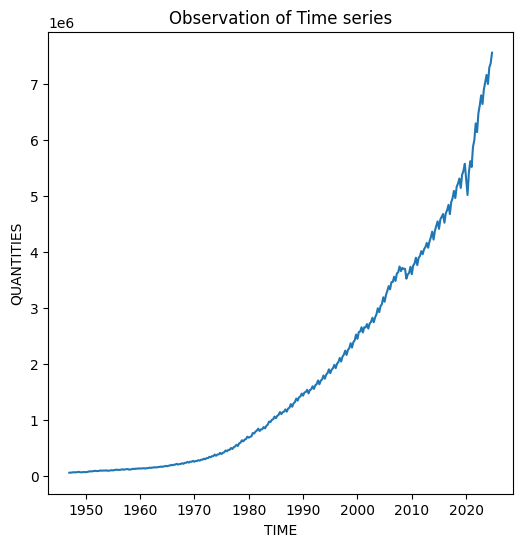

In [181]:
import numpy as np
plt.figure(figsize=(6,6))
plt.plot(df)
plt.xlabel('TIME')
plt.ylabel('QUANTITIES')
plt.title('Observation of Time series')
plt.show()

In [182]:
test = df.groupby(df.index.year)['NA000334Q'].mean()
test

observation_date
1947      62403.75
1948      68617.50
1949      68118.00
1950      74957.00
1951      86727.50
           ...    
2020    5338526.25
2021    5920308.00
2022    6506265.25
2023    6931489.00
2024    7302264.00
Name: NA000334Q, Length: 78, dtype: float64

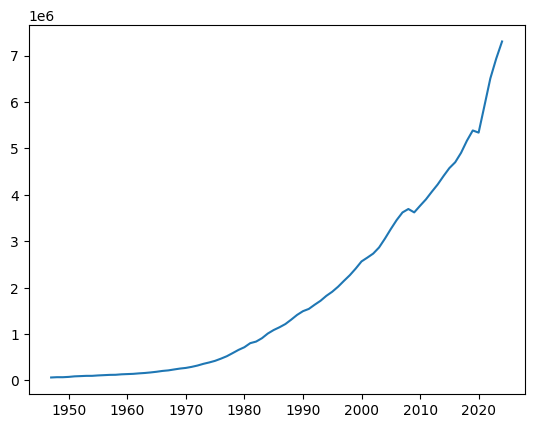

In [183]:
plt.plot(test)
plt.show()

In [184]:
df1 = pd.DataFrame(test)
df1

,NA000334Q
observation_date,
1947,62403.75
1948,68617.50
1949,68118.00
1950,74957.00
1951,86727.50
...,...
2020,5338526.25
2021,5920308.00
2022,6506265.25


In [185]:
df1 = df1.rename(columns={'NA000334Q': 'VOLUME'})

In [186]:
df1.columns

Index(['VOLUME'], dtype='object')

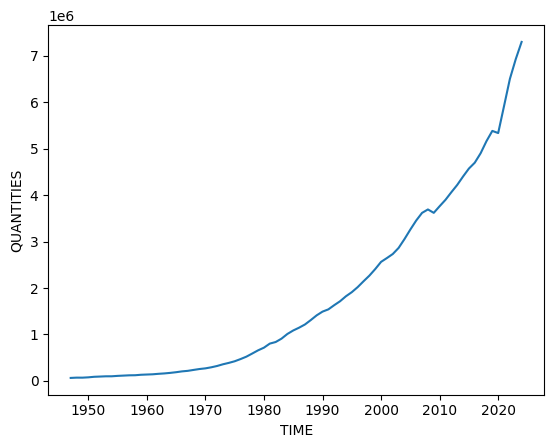

In [187]:
plt.plot(df1.index, df1['VOLUME'])
plt.xlabel('TIME')
plt.ylabel('QUANTITIES')
plt.show()

In [188]:
df1['FD1'] = df1['VOLUME'].diff()
df1['FDlog'] = np.log(df1['VOLUME'])
df1['FD2'] = df1['VOLUME'].diff(periods=2)

In [189]:
df1

,VOLUME,FD1,FDlog,FD2
observation_date,,,,
1947,62403.75,NaN,11.041381,NaN
1948,68617.50,6213.75,11.136303,NaN
1949,68118.00,-499.50,11.128997,5714.25
1950,74957.00,6839.00,11.224670,6339.50
1951,86727.50,11770.50,11.370526,18609.50
...,...,...,...,...
2020,5338526.25,-46343.50,15.490460,174397.25
2021,5920308.00,581781.75,15.593899,535438.25
2022,6506265.25,585957.25,15.688276,1167739.00


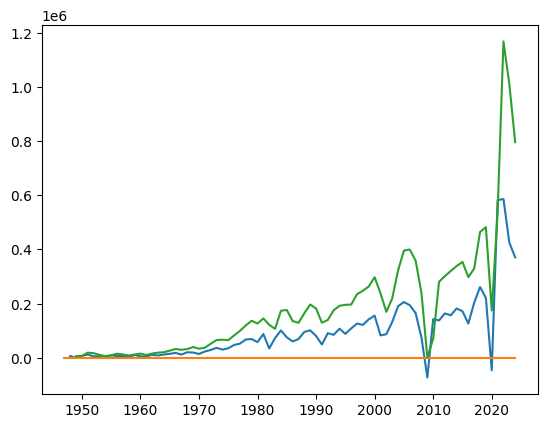

In [190]:
plt.plot(df1.index, df1['FD1'])
plt.plot(df1.index, df1['FDlog'])
plt.plot(df1.index, df1['FD2'])
plt.show()

In [191]:
df1.isna().sum()

VOLUME    0
FD1       1
FDlog     0
FD2       2
dtype: int64

In [192]:
#df1 = df1.fillna(method='backfill')
df1 = df1.bfill()

In [193]:
df1.isna().sum()

VOLUME    0
FD1       0
FDlog     0
FD2       0
dtype: int64

In [194]:
df1.head()

,VOLUME,FD1,FDlog,FD2
observation_date,,,,
1947,62403.75,6213.75,11.041381,5714.25
1948,68617.50,6213.75,11.136303,5714.25
1949,68118.00,-499.50,11.128997,5714.25
1950,74957.00,6839.00,11.224670,6339.50
1951,86727.50,11770.50,11.370526,18609.50


In [195]:
from statsmodels.tsa.stattools import adfuller
result_1 = adfuller(df1['FD1'])
result_2 = adfuller(df1['FD2'])
result_lg = adfuller(df1['FDlog'])

In [196]:
print(f"T-stat: {result_1[0]:.2f} - p-value: {result_1[1]:.2f}")
print(f"T-stat: {result_2[0]:.2f} - p-value: {result_2[1]:.2f}")
print(f"T-stat: {result_lg[0]:.2f} - p-value: {result_lg[1]:.2f}")

T-stat: 1.08 - p-value: 1.00
T-stat: 1.23 - p-value: 1.00
T-stat: -1.53 - p-value: 0.52
